In [ ]:
china_etfs = {
    # '014982': '全球石油指数', 
    # '159949': '创业板50ETF',  
    # '561360': '石油etf',
    # '513030': '德国etf',# '159980': '有色金属etf',
    # '501018': '原油',
    # '513010': '恒生科技',  # '159806': '新能源车etf',
    # '512010': '医药',   
    # '510150': '消费品', # '513010': '恒生科技',  # '159806': '新能源车etf',
    # '159806': '新能源车etf',
    # '561910': '电池etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    # '159980': '有色金属etf',
    # '159892': '恒生医药',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}

In [ ]:
2020-12-31: 选择基金 159985, QQQ, SPY, 510880 (豆粕etf, 纳斯达克ETF, 标普500ETF, 红利ETF)
2021-03-31: 选择基金 SPY, 510880, QQQ, 159985 (标普500ETF, 红利ETF, 纳斯达克ETF, 豆粕etf)
2021-06-30: 选择基金 QQQ, SPY, 159985, 510880 (纳斯达克ETF, 标普500ETF, 豆粕etf, 红利ETF)
2021-09-30: 选择基金 510880, QQQ, 159985, SPY (红利ETF, 纳斯达克ETF, 豆粕etf, 标普500ETF)


2020-12-31: 选择基金 159985, 513520, QQQ, SPY (豆粕etf, 日本etf, 纳斯达克ETF, 标普500ETF)
2021-03-31: 选择基金 SPY, 510880, QQQ, 513520 (标普500ETF, 红利ETF, 纳斯达克ETF, 日本etf)
2021-06-30: 选择基金 QQQ, SPY, 159985, 510880 (纳斯达克ETF, 标普500ETF, 豆粕etf, 红利ETF)
2021-09-30: 选择基金 510880, 513520, QQQ, 159985 (红利ETF, 日本etf, 纳斯达克ETF, 豆粕etf)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取日本etf(513520)数据...


获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取上证5年期国债ETF(511010)数据...

季度选择记录:
2019-09-30: 选择基金  (现金)
2019-12-31: 选择基金 QQQ, SPY, 513520, 159934 (纳斯达克ETF, 标普500ETF, 日本etf, 黄金etf)
2020-03-31: 选择基金 159934, 159985, 510880, QQQ (黄金etf, 豆粕etf, 红利ETF, 纳斯达克ETF)
2020-06-30: 选择基金 QQQ, SPY, 513520, 159934 (纳斯达克ETF, 标普500ETF, 日本etf, 黄金etf)
2020-09-30: 选择基金 QQQ, 159985, SPY, 510880 (纳斯达克ETF, 豆粕etf, 标普500ETF, 红利ETF)
2020-12-31: 选择基金 159985, 513520, QQQ, SPY (豆粕etf, 日本etf, 纳斯达克ETF, 标普500ETF)
2021-03-31: 选择基金 SPY, 510880, QQQ, 513520 (标普500ETF, 红利ETF, 纳斯达克ETF, 日本etf)
2021-06-30: 选择基金 QQQ, SPY, 159985, 510880 (纳斯达克ETF, 标普500ETF, 豆粕etf, 红利ETF)
2021-09-30: 选择基金 510880, 513520, QQQ, 159985 (红利ETF, 日本etf, 纳斯达克ETF, 豆粕etf)
2021-12-31: 选择基金 QQQ, SPY, 159934, 159985 (纳斯达克ETF, 标普500ETF, 黄金etf, 豆粕etf)
2022-03-31: 选择基金 159985, 510880, 159934, SPY (豆粕etf, 红利ETF, 黄金etf, 标普500ETF)
2022-06-30: 选择基金 159934, 510880, 159985, 513520 (黄金etf, 红利ETF, 豆粕etf, 日本etf)
2022-09-30: 选择基金 15998

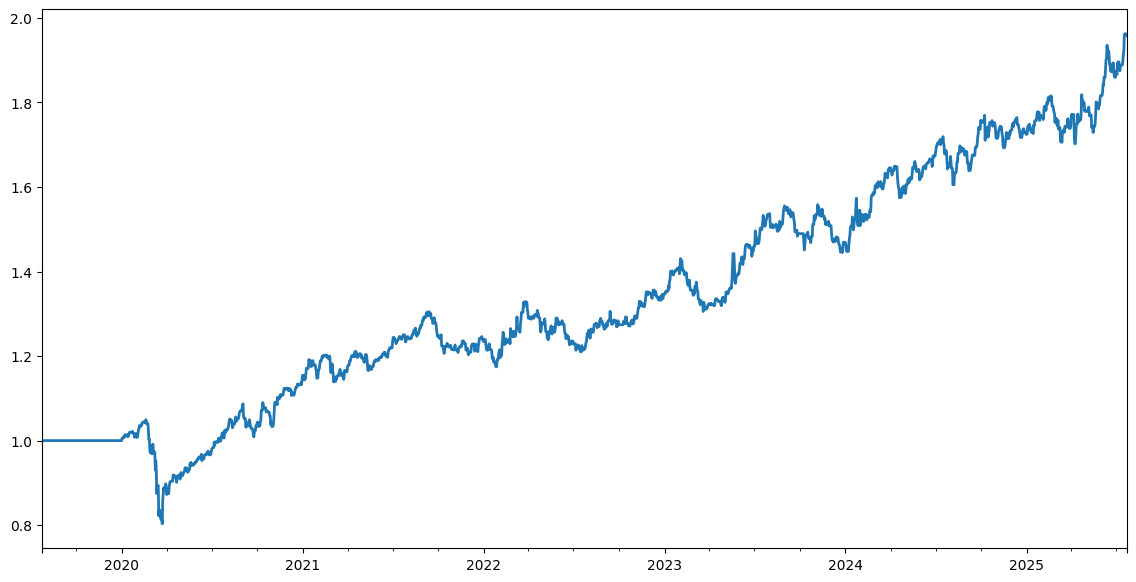

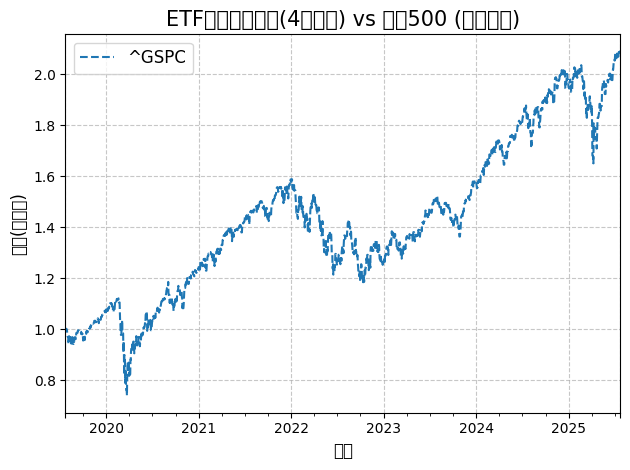

In [101]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=6*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
china_etfs = {
    # '159806': '新能源车etf',
    # '513030': '德国etf',
    # '159980': '有色金属etf',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}

china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def quarterly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    季度轮动策略回测
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和季度选择记录
    """
    # 创建季度末日期序列
    # quarters = pd.date_range(start_date, end_date, freq='Q')
    
    # 创建季度末日期序列（确保包含最后一个季度）
    quarters = pd.date_range(start_date, end_date, freq='Q')
    if end_date not in quarters:  # 如果结束日期不是季度末，则添加
        quarters = quarters.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储季度选择记录
    quarterly_selections = []
    
    # 按季度循环
    for i in range(len(quarters)-1):
        quarter_start = quarters[i]
        quarter_end = quarters[i+1]
        
        # 计算过去一个季度的收益率
        prev_quarter_start = quarter_start - pd.offsets.QuarterEnd()
        returns = {}
        for ticker, df in etf_data.items():
            if prev_quarter_start in df.index and quarter_start in df.index:
                start_price = df.loc[prev_quarter_start, 'close']
                end_price = df.loc[quarter_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最高的4只ETF
        if len(returns) >= 4:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1], reverse=True)[:4]
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            quarterly_selections.append((quarter_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            quarterly_selections.append((quarter_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[quarter_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if quarter_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[quarter_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配25%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 4只基金各25%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本季度每日组合价值
        for date in pd.date_range(quarter_start, quarter_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, quarterly_selections

# 执行回测(初始资金设为10万)
portfolio_value, quarterly_selections = quarterly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n季度选择记录:")
for quarter in quarterly_selections:
    date = quarter[0].strftime('%Y-%m-%d')
    tickers = ", ".join(quarter[1])
    names = ", ".join(quarter[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF季度轮动策略(4只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取日本etf(513520)数据...


获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取上证5年期国债ETF(511010)数据...

季度选择记录:
2020-09-30: 选择基金  (现金)
2020-12-31: 选择基金 159985, 513520, QQQ, SPY, 510880 (豆粕etf, 日本etf, 纳斯达克ETF, 标普500ETF, 红利ETF)
2021-03-31: 选择基金 SPY, 510880, QQQ, 513520, 159985 (标普500ETF, 红利ETF, 纳斯达克ETF, 日本etf, 豆粕etf)
2021-06-30: 选择基金 QQQ, SPY, 159985, 510880, 159934 (纳斯达克ETF, 标普500ETF, 豆粕etf, 红利ETF, 黄金etf)
2021-09-30: 选择基金 510880, 513520, QQQ, 159985, SPY (红利ETF, 日本etf, 纳斯达克ETF, 豆粕etf, 标普500ETF)
2021-12-31: 选择基金 QQQ, SPY, 159934, 159985, 510880 (纳斯达克ETF, 标普500ETF, 黄金etf, 豆粕etf, 红利ETF)
2022-03-31: 选择基金 159985, 510880, 159934, SPY, 513520 (豆粕etf, 红利ETF, 黄金etf, 标普500ETF, 日本etf)
2022-06-30: 选择基金 159934, 510880, 159985, 513520, SPY (黄金etf, 红利ETF, 豆粕etf, 日本etf, 标普500ETF)
2022-09-30: 选择基金 159985, 510880, 159934, 513520, QQQ (豆粕etf, 红利ETF, 黄金etf, 日本etf, 纳斯达克ETF)
2022-12-31: 选择基金 513120, 159985, SPY, 513520, 159934 (创新药, 豆粕etf, 标普500ETF, 日本etf, 黄金etf)
2023-03-31: 选择基金 QQQ, SPY, 159934, 51352

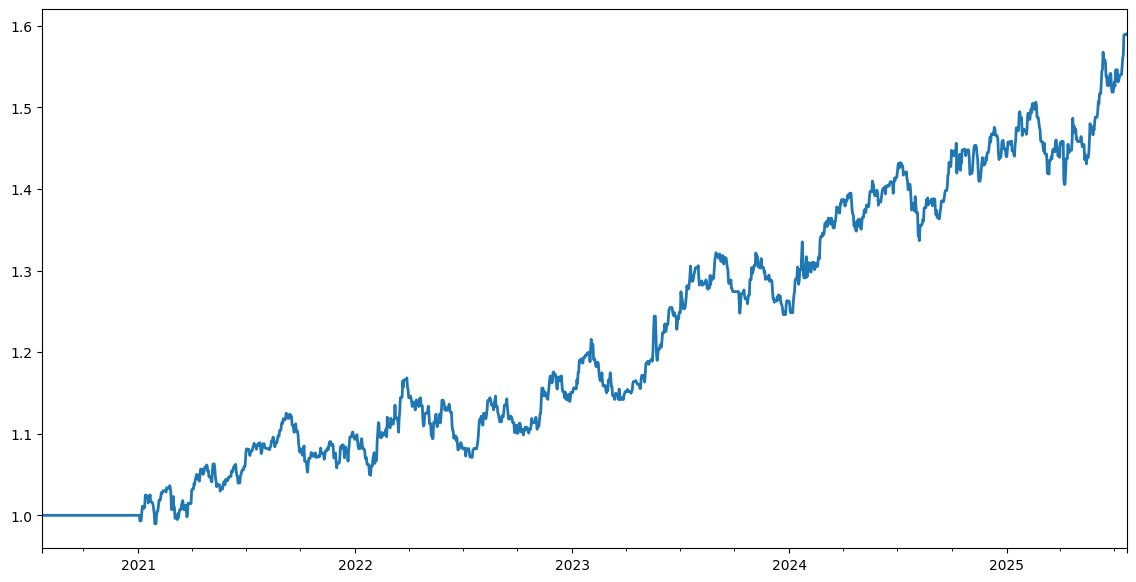

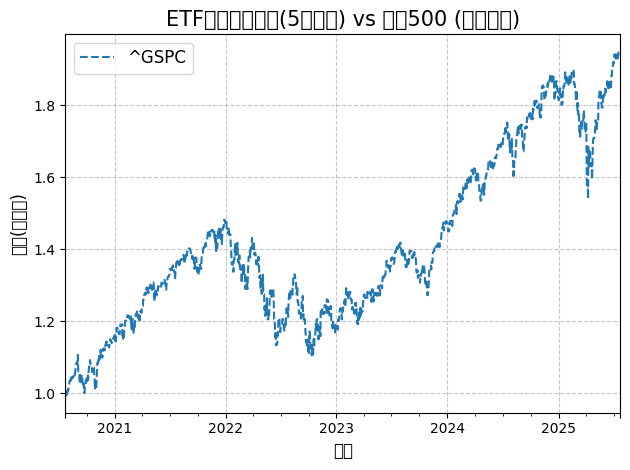

In [85]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=5*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
# china_etfs = {
#     # '510150': '消费品', 
#     # '513010': '恒生科技',  # 
#     '159806': '新能源车etf',
#     '513030': '德国etf',
#     '159980': '有色金属etf',
#     '159934': '黄金etf',
#     '159985': '豆粕etf',
#     '510880': '红利ETF',
#     '513120': '创新药',
#     '511010': '上证5年期国债ETF'
# }

china_etfs = {
    # '159806': '新能源车etf',
    # '513030': '德国etf',
    # '159980': '有色金属etf',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}


china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def quarterly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    季度轮动策略回测
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和季度选择记录
    """
    # 创建季度末日期序列
    # quarters = pd.date_range(start_date, end_date, freq='Q')
    
    # 创建季度末日期序列（确保包含最后一个季度）
    quarters = pd.date_range(start_date, end_date, freq='Q')
    if end_date not in quarters:  # 如果结束日期不是季度末，则添加
        quarters = quarters.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储季度选择记录
    quarterly_selections = []
    
    # 按季度循环
    for i in range(len(quarters)-1):
        quarter_start = quarters[i]
        quarter_end = quarters[i+1]
        
        # 计算过去一个季度的收益率
        prev_quarter_start = quarter_start - pd.offsets.QuarterEnd()
        returns = {}
        for ticker, df in etf_data.items():
            if prev_quarter_start in df.index and quarter_start in df.index:
                start_price = df.loc[prev_quarter_start, 'close']
                end_price = df.loc[quarter_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最高的5只ETF
        if len(returns) >= 5:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1], reverse=True)[:5]
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            quarterly_selections.append((quarter_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            quarterly_selections.append((quarter_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[quarter_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if quarter_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[quarter_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配20%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 5只基金各20%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本季度每日组合价值
        for date in pd.date_range(quarter_start, quarter_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, quarterly_selections

# 执行回测(初始资金设为10万)
portfolio_value, quarterly_selections = quarterly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n季度选择记录:")
for quarter in quarterly_selections:
    date = quarter[0].strftime('%Y-%m-%d')
    tickers = ", ".join(quarter[1])
    names = ", ".join(quarter[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF季度轮动策略(5只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取德国etf(513030)数据...


获取日本etf(513520)数据...
获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取上证5年期国债ETF(511010)数据...

每2个月选择记录:
2020-07-31: 选择基金  (现金)
2020-09-30: 选择基金 QQQ, 159985, SPY, 513520 (纳斯达克ETF, 豆粕etf, 标普500ETF, 日本etf)
2020-11-30: 选择基金 513520, 159985, SPY, QQQ (日本etf, 豆粕etf, 标普500ETF, 纳斯达克ETF)
2021-01-31: 选择基金 159985, QQQ, 159934, SPY (豆粕etf, 纳斯达克ETF, 黄金etf, 标普500ETF)
2021-03-31: 选择基金 513030, SPY, 510880, 513520 (德国etf, 标普500ETF, 红利ETF, 日本etf)
2021-05-31: 选择基金 159934, SPY, QQQ, 159985 (黄金etf, 标普500ETF, 纳斯达克ETF, 豆粕etf)
2021-07-31: 选择基金 QQQ, SPY, 159985, 510880 (纳斯达克ETF, 标普500ETF, 豆粕etf, 红利ETF)
2021-09-30: 选择基金 510880, 513520, QQQ, SPY (红利ETF, 日本etf, 纳斯达克ETF, 标普500ETF)
2021-11-30: 选择基金 QQQ, SPY, 159934, 513030 (纳斯达克ETF, 标普500ETF, 黄金etf, 德国etf)
2022-01-31: 选择基金 159985, 510880, 513030, 159934 (豆粕etf, 红利ETF, 德国etf, 黄金etf)
2022-03-31: 选择基金 159985, 510880, 159934, SPY (豆粕etf, 红利ETF, 黄金etf, 标普500ETF)
2022-05-31: 选择基金 159985, 159934, 513030, 513520 (豆粕etf, 黄金etf, 德国etf, 日本et

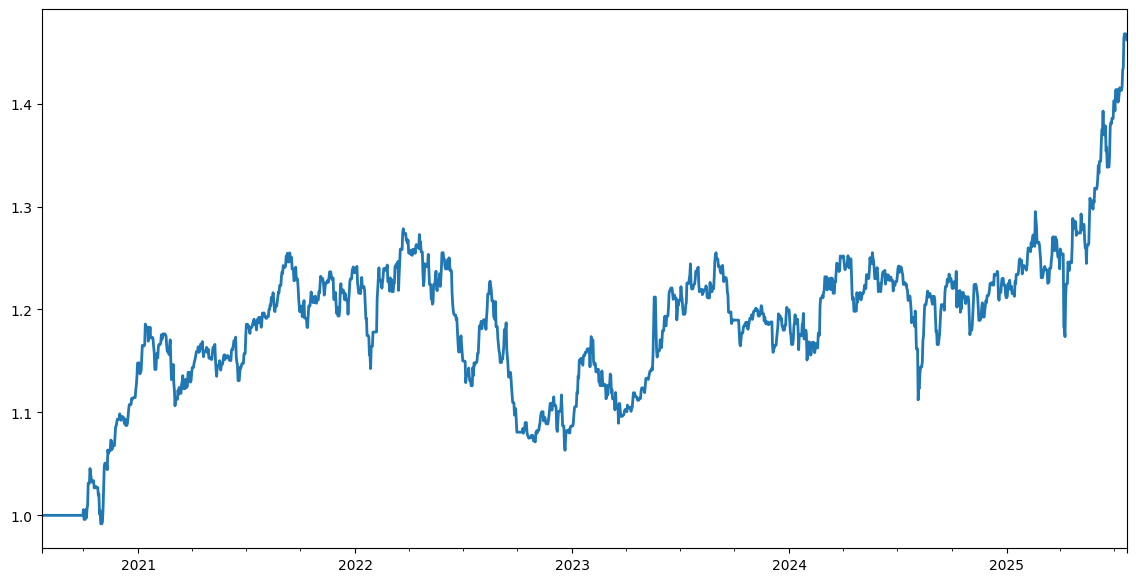

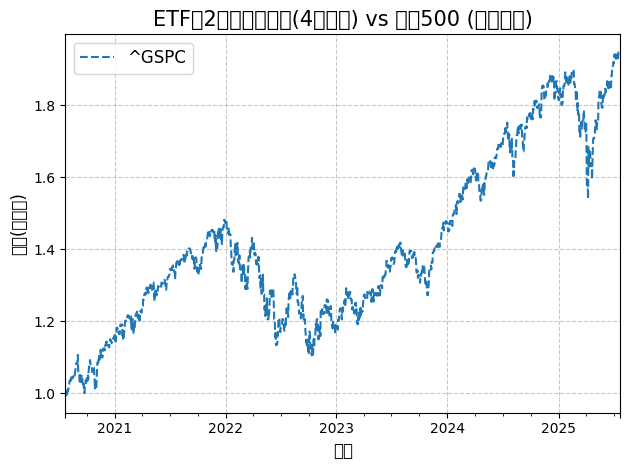

In [95]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=5*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
china_etfs = {
    # '159806': '新能源车etf',
    '513030': '德国etf',
    # '159980': '有色金属etf',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}

china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def bimonthly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    每2个月轮动策略回测
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和调整期选择记录
    """
    # 创建每2个月末日期序列
    bimonthly_dates = pd.date_range(start_date, end_date, freq='2M')
    if end_date not in bimonthly_dates:  # 如果结束日期不是2个月末，则添加
        bimonthly_dates = bimonthly_dates.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储调整期选择记录
    bimonthly_selections = []
    
    # 按每2个月循环
    for i in range(len(bimonthly_dates)-1):
        period_start = bimonthly_dates[i]
        period_end = bimonthly_dates[i+1]
        
        # 计算过去2个月的收益率
        prev_period_start = period_start - pd.DateOffset(months=2)
        returns = {}
        for ticker, df in etf_data.items():
            if prev_period_start in df.index and period_start in df.index:
                start_price = df.loc[prev_period_start, 'close']
                end_price = df.loc[period_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最高的4只ETF
        if len(returns) >= 4:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1], reverse=True)[:4]
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            bimonthly_selections.append((period_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            bimonthly_selections.append((period_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[period_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if period_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[period_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配25%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 4只基金各25%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本调整期每日组合价值
        for date in pd.date_range(period_start, period_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, bimonthly_selections

# 执行回测(初始资金设为10万)
portfolio_value, bimonthly_selections = bimonthly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n每2个月选择记录:")
for selection in bimonthly_selections:
    date = selection[0].strftime('%Y-%m-%d')
    tickers = ", ".join(selection[1])
    names = ", ".join(selection[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF每2个月轮动策略(4只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取德国etf(513030)数据...


获取恒生科技(513010)数据...
获取日本etf(513520)数据...
获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取上证5年期国债ETF(511010)数据...

季度选择记录:
2019-09-30: 选择基金  (现金)
2019-12-31: 选择基金 159934, 511010, 510880, 513520 (黄金etf, 上证5年期国债ETF, 红利ETF, 日本etf)
2020-03-31: 选择基金 513030, SPY, 513520, QQQ (德国etf, 标普500ETF, 日本etf, 纳斯达克ETF)
2020-06-30: 选择基金 159985, 511010, 510880, 159934 (豆粕etf, 上证5年期国债ETF, 红利ETF, 黄金etf)
2020-09-30: 选择基金 511010, 159934, 513520, 513030 (上证5年期国债ETF, 黄金etf, 日本etf, 德国etf)
2020-12-31: 选择基金 159934, 511010, 510880, 513030 (黄金etf, 上证5年期国债ETF, 红利ETF, 德国etf)
2021-03-31: 选择基金 159934, 159985, 513520, 511010 (黄金etf, 豆粕etf, 日本etf, 上证5年期国债ETF)
2021-06-30: 选择基金 513520, 511010, 159934, 510880 (日本etf, 上证5年期国债ETF, 黄金etf, 红利ETF)
2021-09-30: 选择基金 513010, 513030, 159934, SPY (恒生科技, 德国etf, 黄金etf, 标普500ETF)
2021-12-31: 选择基金 513010, 513520, 510880, 159985 (恒生科技, 日本etf, 红利ETF, 豆粕etf)
2022-03-31: 选择基金 513010, 513030, QQQ, 513520 (恒生科技, 德国etf, 纳斯达克ETF, 日本etf)
2022-06-30: 选择基金 QQQ, SP

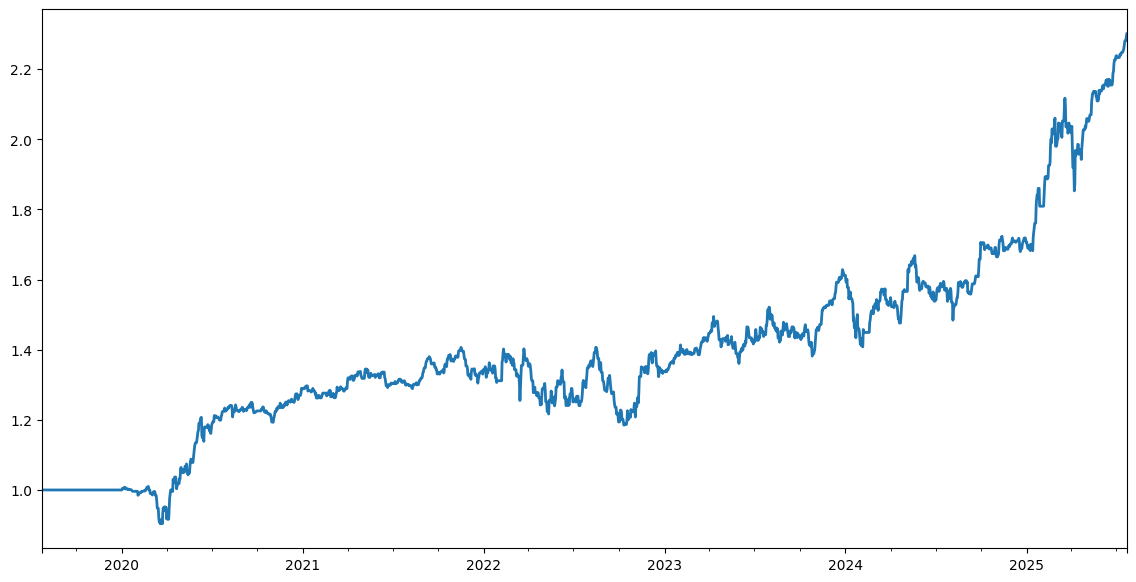

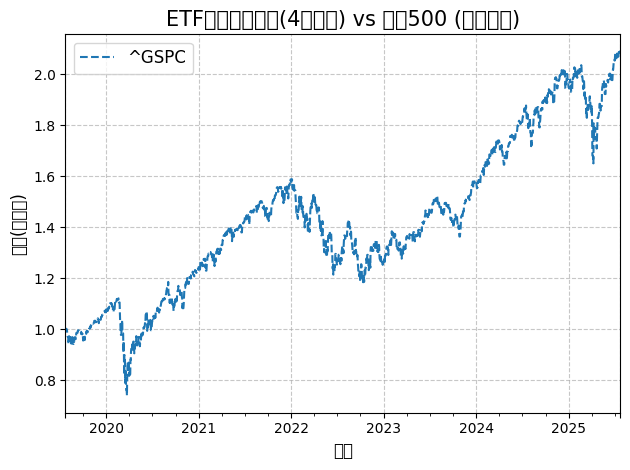

In [133]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=6*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
china_etfs = {
    # '159806': '新能源车etf',
    '513030': '德国etf',
    # '159980': '有色金属etf',
    '513010': '恒生科技',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}

china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def quarterly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    季度轮动策略回测（反转策略）
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和季度选择记录
    """
    # 创建季度末日期序列
    # quarters = pd.date_range(start_date, end_date, freq='Q')
    
    # 创建季度末日期序列（确保包含最后一个季度）
    quarters = pd.date_range(start_date, end_date, freq='Q')
    if end_date not in quarters:  # 如果结束日期不是季度末，则添加
        quarters = quarters.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储季度选择记录
    quarterly_selections = []
    
    # 按季度循环
    for i in range(len(quarters)-1):
        quarter_start = quarters[i]
        quarter_end = quarters[i+1]
        
        # 计算过去一个季度的收益率
        prev_quarter_start = quarter_start - pd.offsets.QuarterEnd()
        returns = {}
        for ticker, df in etf_data.items():
            if prev_quarter_start in df.index and quarter_start in df.index:
                start_price = df.loc[prev_quarter_start, 'close']
                end_price = df.loc[quarter_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最低的4只ETF（反转策略）
        if len(returns) >= 4:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1])[:4]  # 改为升序排序，选择表现最差的
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            quarterly_selections.append((quarter_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            quarterly_selections.append((quarter_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[quarter_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if quarter_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[quarter_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配25%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 4只基金各25%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本季度每日组合价值
        for date in pd.date_range(quarter_start, quarter_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, quarterly_selections

# 执行回测(初始资金设为10万)
portfolio_value, quarterly_selections = quarterly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n季度选择记录:")
for quarter in quarterly_selections:
    date = quarter[0].strftime('%Y-%m-%d')
    tickers = ", ".join(quarter[1])
    names = ", ".join(quarter[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF季度反转策略(4只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
=====A======
策略绩效指标(5年回测):
初始资金: 100,000元
最终资金: 197,599.80元
总收益率: 97.60%
年化收益率: 8.15%
年化波动率: 8.82%
夏普比率: 0.58
最大回撤: -12.62%
Alpha(相对于标普500): 2.79%
Beta(相对于标普500): 0.31

分年度收益率:
2020: 14.89%
2021: 12.91%
2022: 3.78%
2023: 18.85%
2024: 4.37%
2025: 18.33%

半年度收益率:
2020-01: -0.06%
2020-07: 12.27%
2021-01: 0.93%
2021-07: 8.82%
2022-01: 6.41%
2022-07: 4.18%
2023-01: 2.17%
2023-07: 7.41%
2024-01: -0.95%
2024-07: 2.70%
2025-01: 9.95%
2025-07: 17.84%

======B=======
策略绩效指标(5年回测):
初始资金: 100,000元
最终资金: 199,885.42元
总收益率: 99.89%
年化收益率: 8.29%
年化波动率: 9.13%
夏普比率: 0.58
最大回撤: -14.01%
Alpha(相对于标普500): 3.21%
Beta(相对于标普500): 0.28

分年度收益率:
2020: 21.24%
2021: 9.35%
2022: -0.14%
2023: 20.57%
2024: 4.07%
2025: 20.34%

半年度收益率:
2020-01: -0.38%
2020-07: 17.73%
2021-01: 1.89%
2021-07: 2.82%
2022-01: 7.31%
2022-07: 2.16%
2023-01: 1.90%
2023-07: 7.41%
2024-01: 0.48%
2024-07: 4.54%
2025-01: 8.00%
2025-07: 19.51%

---------------C-----------
策略绩效指标(5年回测):
初始资金: 100,000元
最终资金: 230,110.57元
总收益率: 130.11%
年化收益率: 10.06%
年化波动率: 11.67%
夏普比率: 0.60
最大回撤: -15.78%
Alpha(相对于标普500): 5.00%
Beta(相对于标普500): 0.27

分年度收益率:
2020: 28.88%
2021: 4.21%
2022: -0.39%
2023: 20.49%
2024: 5.82%
2025: 34.89%

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取恒生科技(513010)数据...


获取日本etf(513520)数据...
获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取德国etf(513030)数据...
获取上证5年期国债ETF(511010)数据...

季度选择记录:
2019-09-30: 选择基金  (现金)
2019-12-31: 选择基金 159934, 511010, 510880, 513520 (黄金etf, 上证5年期国债ETF, 红利ETF, 日本etf)
2020-03-31: 选择基金 513030, SPY, 513520, QQQ (德国etf, 标普500ETF, 日本etf, 纳斯达克ETF)
2020-06-30: 选择基金 159985, 511010, 510880, 159934 (豆粕etf, 上证5年期国债ETF, 红利ETF, 黄金etf)
2020-09-30: 选择基金 511010, 159934, 513520, 513030 (上证5年期国债ETF, 黄金etf, 日本etf, 德国etf)
2020-12-31: 选择基金 SPY, QQQ, 513010, 159934 (标普500ETF, 纳斯达克ETF, 恒生科技, 黄金etf)
2021-03-31: 选择基金 QQQ, SPY, 513010, 159934 (纳斯达克ETF, 标普500ETF, 恒生科技, 黄金etf)
2021-06-30: 选择基金 513520, 511010, 159934, 510880 (日本etf, 上证5年期国债ETF, 黄金etf, 红利ETF)
2021-09-30: 选择基金 513010, 513030, 159934, SPY (恒生科技, 德国etf, 黄金etf, 标普500ETF)
2021-12-31: 选择基金 513010, 513520, 510880, 159985 (恒生科技, 日本etf, 红利ETF, 豆粕etf)
2022-03-31: 选择基金 513010, 513030, QQQ, 513520 (恒生科技, 德国etf, 纳斯达克ETF, 日本etf)
2022-06-30: 选择基金 QQQ, SPY, 513030, 51

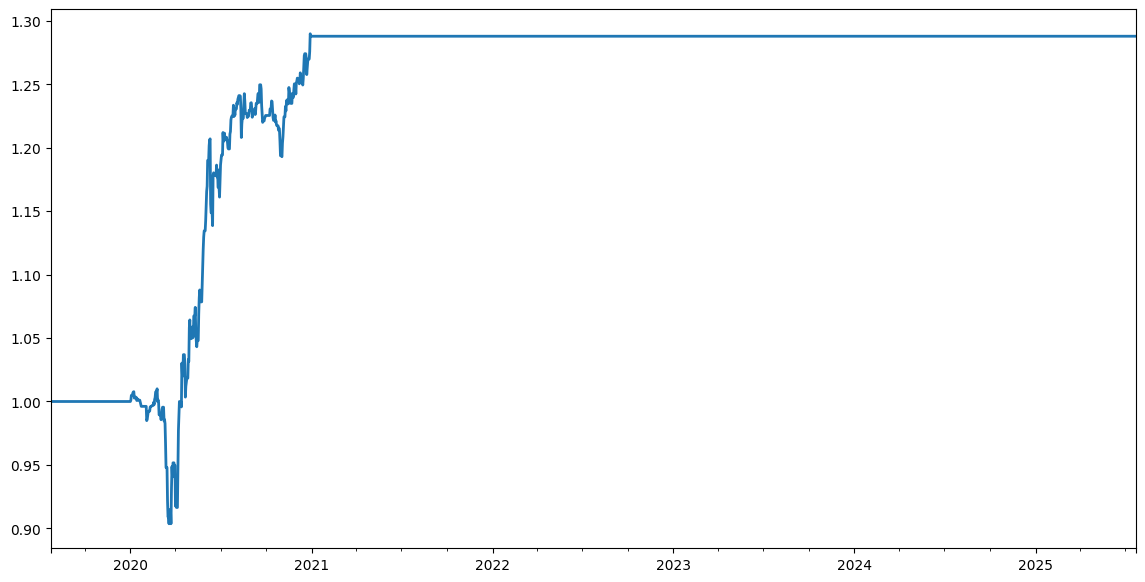

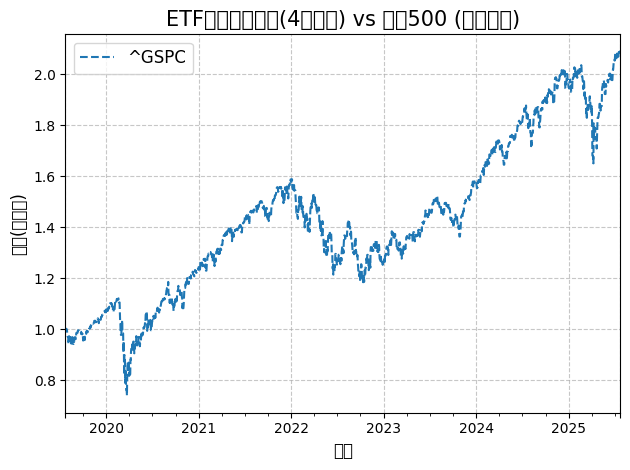

In [132]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=6*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
china_etfs = {
    # '159806': '新能源车etf',
    # '159980': '有色金属etf',
    '513010': '恒生科技',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '513030': '德国etf',
    '511010': '上证5年期国债ETF'
}

china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def quarterly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    季度轮动策略回测（反转策略）
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和季度选择记录
    """
    # 创建季度末日期序列
    # quarters = pd.date_range(start_date, end_date, freq='Q')
    
    # 创建季度末日期序列（确保包含最后一个季度）
    quarters = pd.date_range(start_date, end_date, freq='Q')
    if end_date not in quarters:  # 如果结束日期不是季度末，则添加
        quarters = quarters.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储季度选择记录
    quarterly_selections = []
    
    # 按季度循环
    for i in range(len(quarters)-1):
        quarter_start = quarters[i]
        quarter_end = quarters[i+1]
        
        # 计算过去一个季度的收益率
        prev_quarter_start = quarter_start - pd.offsets.QuarterEnd()
        returns = {}
        for ticker, df in etf_data.items():
            if prev_quarter_start in df.index and quarter_start in df.index:
                start_price = df.loc[prev_quarter_start, 'close']
                end_price = df.loc[quarter_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最低的4只ETF（反转策略）
        if len(returns) >= 4:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1])[:4]  # 改为升序排序，选择表现最差的
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            quarterly_selections.append((quarter_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            quarterly_selections.append((quarter_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[quarter_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if quarter_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[quarter_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配25%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 4只基金各25%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本季度每日组合价值
        for date in pd.date_range(quarter_start, quarter_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, quarterly_selections

# 执行回测(初始资金设为10万)
portfolio_value, quarterly_selections = quarterly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    # 半年度收益率
    halfyear_returns = portfolio_value.resample('6M').last().pct_change()
    halfyear_returns.index = halfyear_returns.index.strftime('%Y-%m')
    halfyear_returns = halfyear_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns,
        '半年度收益率': halfyear_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n季度选择记录:")
for quarter in quarterly_selections:
    date = quarter[0].strftime('%Y-%m-%d')
    tickers = ", ".join(quarter[1])
    names = ", ".join(quarter[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

print("\n半年度收益率:")
for period, ret in metrics['半年度收益率'].items():
    print(f"{period}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF季度反转策略(4只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

获取QQQ数据...
获取SPY数据...
获取标普500指数数据...
获取德国etf(513030)数据...


获取恒生科技(513010)数据...
获取日本etf(513520)数据...
获取黄金etf(159934)数据...
获取豆粕etf(159985)数据...
获取红利ETF(510880)数据...
获取创新药(513120)数据...
获取上证5年期国债ETF(511010)数据...

季度选择记录:
2020-09-30: 选择基金  (现金)
2020-12-31: 选择基金 159934, 511010, 510880, 513030, SPY (黄金etf, 上证5年期国债ETF, 红利ETF, 德国etf, 标普500ETF)
2021-03-31: 选择基金 159934, 159985, 513520, 511010, QQQ (黄金etf, 豆粕etf, 日本etf, 上证5年期国债ETF, 纳斯达克ETF)
2021-06-30: 选择基金 513520, 511010, 159934, 510880, 513030 (日本etf, 上证5年期国债ETF, 黄金etf, 红利ETF, 德国etf)
2021-09-30: 选择基金 513010, 513030, 159934, SPY, 159985 (恒生科技, 德国etf, 黄金etf, 标普500ETF, 豆粕etf)
2021-12-31: 选择基金 513010, 513520, 510880, 159985, 513030 (恒生科技, 日本etf, 红利ETF, 豆粕etf, 德国etf)
2022-03-31: 选择基金 513010, 513030, QQQ, 513520, SPY (恒生科技, 德国etf, 纳斯达克ETF, 日本etf, 标普500ETF)
2022-06-30: 选择基金 QQQ, SPY, 513030, 513520, 159985 (纳斯达克ETF, 标普500ETF, 德国etf, 日本etf, 豆粕etf)
2022-09-30: 选择基金 513010, 513030, SPY, QQQ, 513520 (恒生科技, 德国etf, 标普500ETF, 纳斯达克ETF, 日本etf)
2022-12-31: 选择基金 510880, QQQ, 511010, 159934, 513520 (红利ETF, 纳斯达克ETF, 上证5年期国

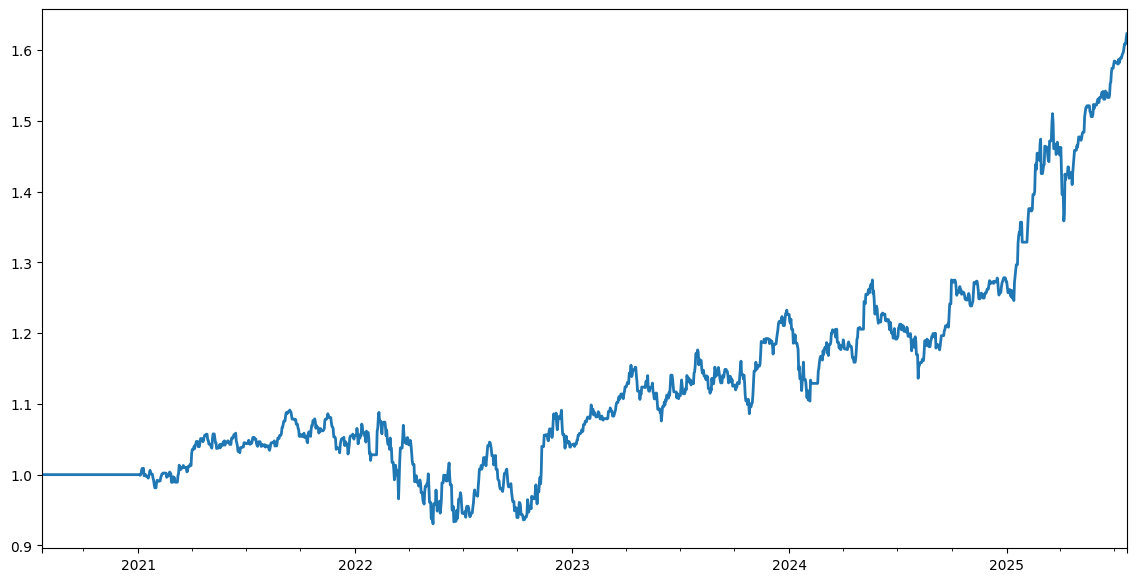

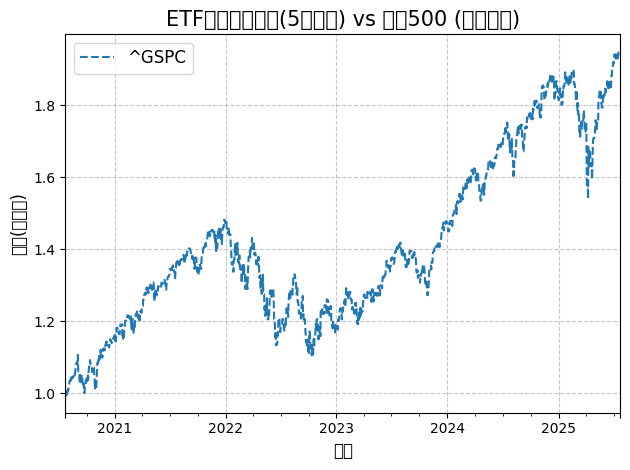

In [120]:
# 导入所需库
import yfinance as yf
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置回测日期范围
end_date = datetime(2025, 7, 22)
start_date = end_date - timedelta(days=5*365)

# ================== 数据获取部分 ==================

# 获取国际ETF数据 (yfinance) - 加入SPY(标普500ETF)
intl_etfs = {
    'QQQ': '纳斯达克ETF',
    # 'SOYB': '大豆ETF',
    # 'GLD': '黄金ETF',
    # "BTC-USD":"Bitcoin",
    # 'SHY': 'usbond-ETF',
    'SPY': '标普500ETF'  # 新增SPY
}

intl_data = {}
for ticker, name in intl_etfs.items():
    print(f"获取{ticker}数据...")
    df = yf.download(ticker, start=start_date, end=end_date)
    if not df.empty:
        intl_data[ticker] = df[['Close']].rename(columns={'Close': 'close'})

# 获取标普500数据作为基准
print("获取标普500指数数据...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)[['Close']].rename(columns={'Close': 'close'})

# 获取中国ETF数据 (AKShare)
def fetch_etf_data_ak(symbol, start_date, end_date):
    """通过AKShare获取ETF数据"""
    try:
        df = ak.fund_etf_hist_em(symbol=symbol, period="daily", 
                                start_date=start_date.strftime("%Y%m%d"), 
                                end_date=end_date.strftime("%Y%m%d"), 
                                adjust="hfq")
        df = df.rename(columns={'日期':'date', '收盘':'close'})
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        return df[['close']]
    except Exception as e:
        print(f"获取{symbol}数据失败: {e}")
        return None

# 中国ETF列表
china_etfs = {
    # '159806': '新能源车etf',
    '513030': '德国etf',
    # '159980': '有色金属etf',
    '513010': '恒生科技',
    '513520': '日本etf',
    '159934': '黄金etf',
    '159985': '豆粕etf',
    '510880': '红利ETF',
    '513120': '创新药',
    '511010': '上证5年期国债ETF'
}

china_data = {}
for code, name in china_etfs.items():
    print(f"获取{name}({code})数据...")
    df = fetch_etf_data_ak(code, start_date, end_date)
    if df is not None and not df.empty:
        china_data[code] = df

# 合并所有ETF数据
all_etfs = {}
for ticker, df in intl_data.items():
    all_etfs[ticker] = df
    
for code, df in china_data.items():
    all_etfs[code] = df

# 确保所有数据都有相同的日期索引
all_dates = pd.date_range(start_date, end_date)
for ticker in all_etfs:
    all_etfs[ticker] = all_etfs[ticker].reindex(all_dates).fillna(method='ffill')

# 标准化标普500数据
sp500 = sp500.reindex(all_dates).fillna(method='ffill')

# ================== 策略回测部分 ==================

def quarterly_rotation_backtest(etf_data, start_date, end_date, initial_capital=100000):
    """
    季度轮动策略回测（反转策略）
    :param etf_data: 包含所有ETF数据的字典
    :param start_date: 回测开始日期
    :param end_date: 回测结束日期
    :param initial_capital: 初始资金(10万)
    :return: 回测结果DataFrame和季度选择记录
    """
    # 创建季度末日期序列
    # quarters = pd.date_range(start_date, end_date, freq='Q')
    
    # 创建季度末日期序列（确保包含最后一个季度）
    quarters = pd.date_range(start_date, end_date, freq='Q')
    if end_date not in quarters:  # 如果结束日期不是季度末，则添加
        quarters = quarters.append(pd.DatetimeIndex([end_date]))
    
    # 初始化持仓和组合价值
    portfolio_value = pd.Series(index=pd.date_range(start_date, end_date), dtype=float)
    portfolio_value.iloc[0] = initial_capital
    current_holdings = {}  # {ticker: shares}
    current_cash = initial_capital
    
    # 存储季度选择记录
    quarterly_selections = []
    
    # 按季度循环
    for i in range(len(quarters)-1):
        quarter_start = quarters[i]
        quarter_end = quarters[i+1]
        
        # 计算过去一个季度的收益率
        prev_quarter_start = quarter_start - pd.offsets.QuarterEnd()
        returns = {}
        for ticker, df in etf_data.items():
            if prev_quarter_start in df.index and quarter_start in df.index:
                start_price = df.loc[prev_quarter_start, 'close']
                end_price = df.loc[quarter_start, 'close']
                # 确保获取的是标量值而不是Series
                if isinstance(start_price, pd.Series):
                    start_price = start_price.iloc[0]
                if isinstance(end_price, pd.Series):
                    end_price = end_price.iloc[0]
                returns[ticker] = (end_price - start_price) / start_price
        
        # 选择收益率最低的5只ETF（反转策略）
        if len(returns) >= 5:
            # 确保所有返回值都是标量
            valid_returns = {k: v for k, v in returns.items() if not isinstance(v, (pd.Series, pd.DataFrame))}
            selected = sorted(valid_returns.items(), key=lambda x: x[1])[:5]  # 改为升序排序，选择表现最差的5只
            selected_tickers = [x[0] for x in selected]
            selected_names = [intl_etfs.get(ticker, china_etfs.get(ticker, ticker)) for ticker in selected_tickers]
            quarterly_selections.append((quarter_start, selected_tickers, selected_names))
        else:
            # 如果没有足够数据，保持现金
            selected_tickers = []
            quarterly_selections.append((quarter_start, [], ["现金"]))
        
        # 计算调仓日价格
        rebalance_prices = {}
        for ticker in selected_tickers:
            price = etf_data[ticker].loc[quarter_start, 'close']
            if isinstance(price, pd.Series):
                price = price.iloc[0]
            rebalance_prices[ticker] = price
        
        # 卖出当前持仓
        for ticker, shares in current_holdings.items():
            if quarter_start in etf_data[ticker].index:
                price = etf_data[ticker].loc[quarter_start, 'close']
                if isinstance(price, pd.Series):
                    price = price.iloc[0]
                current_cash += shares * price
        
        current_holdings = {}
        
        # 买入新持仓(每只基金分配20%资金)
        if selected_tickers:
            allocation = current_cash / len(selected_tickers)  # 5只基金各20%
            for ticker in selected_tickers:
                price = rebalance_prices[ticker]
                shares = allocation / price
                current_holdings[ticker] = shares
                current_cash -= shares * price
        
        # 计算本季度每日组合价值
        for date in pd.date_range(quarter_start, quarter_end):
            if date in portfolio_value.index:
                daily_value = current_cash
                for ticker, shares in current_holdings.items():
                    if date in etf_data[ticker].index:
                        price = etf_data[ticker].loc[date, 'close']
                        if isinstance(price, pd.Series):
                            price = price.iloc[0]
                        daily_value += shares * price
                portfolio_value.loc[date] = daily_value
    
    # 填充缺失值(前向填充)
    portfolio_value = portfolio_value.ffill()
    
    return portfolio_value, quarterly_selections

# 执行回测(初始资金设为10万)
portfolio_value, quarterly_selections = quarterly_rotation_backtest(all_etfs, start_date, end_date, initial_capital=100000)

# 计算每日收益率
daily_returns = portfolio_value.pct_change().dropna()

# ================== 绩效计算部分 ==================

def calculate_performance_metrics(portfolio_value, daily_returns, benchmark_returns):
    """
    计算绩效指标
    :param portfolio_value: 组合价值序列
    :param daily_returns: 每日收益率序列
    :param benchmark_returns: 基准收益率序列
    :return: 绩效指标字典
    """
    # 总收益率
    total_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) - 1
    
    # 年化收益率
    years = len(portfolio_value) / 252
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # 年化波动率
    annualized_volatility = daily_returns.std() * np.sqrt(252)
    
    # 夏普比率(假设无风险利率3%)
    risk_free_rate = 0.03
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    # 最大回撤
    cumulative_returns = (1 + daily_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # 确保日期对齐
    aligned_returns, aligned_benchmark = daily_returns.align(benchmark_returns, join='inner')
    aligned_returns_array = aligned_returns.values
    aligned_benchmark_array = aligned_benchmark.values
    
    # 检查并调整数组形状
    if aligned_returns_array.ndim > 1:
        aligned_returns_array = aligned_returns_array.flatten()
    if aligned_benchmark_array.ndim > 1:
        aligned_benchmark_array = aligned_benchmark_array.flatten()
    
    # 计算Beta
    covariance_matrix = np.cov(aligned_returns_array, aligned_benchmark_array)
    covariance = covariance_matrix[0, 1]
    benchmark_variance = np.var(aligned_benchmark_array)
    beta = covariance / benchmark_variance
    
    # 计算Alpha - 确保结果是标量值
    benchmark_annual_return = (1 + aligned_benchmark.mean()) ** 252 - 1
    if isinstance(benchmark_annual_return, pd.Series):
        benchmark_annual_return = benchmark_annual_return.iloc[0]
    alpha = float(annualized_return - (risk_free_rate + beta * (benchmark_annual_return - risk_free_rate)))
    
    # 分年度收益率
    yearly_returns = portfolio_value.resample('Y').last().pct_change()
    yearly_returns.index = yearly_returns.index.year
    yearly_returns = yearly_returns.dropna()
    
    # 半年度收益率
    halfyear_returns = portfolio_value.resample('6M').last().pct_change()
    halfyear_returns.index = halfyear_returns.index.strftime('%Y-%m')
    halfyear_returns = halfyear_returns.dropna()
    
    return {
        '总收益率': total_return,
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        'Alpha': alpha,
        'Beta': beta,
        '分年度收益率': yearly_returns,
        '半年度收益率': halfyear_returns
    }

# 计算标普500收益率
sp500_returns = sp500['close'].pct_change().dropna()

# 计算绩效指标
metrics = calculate_performance_metrics(portfolio_value, daily_returns, sp500_returns)

# ================== 结果展示部分 ==================

print("\n季度选择记录:")
for quarter in quarterly_selections:
    date = quarter[0].strftime('%Y-%m-%d')
    tickers = ", ".join(quarter[1])
    names = ", ".join(quarter[2])
    print(f"{date}: 选择基金 {tickers} ({names})")

print("\n策略绩效指标(5年回测):")
print(f"初始资金: 100,000元")
print(f"最终资金: {portfolio_value.iloc[-1]:,.2f}元")
print(f"总收益率: {metrics['总收益率']*100:.2f}%")
print(f"年化收益率: {metrics['年化收益率']*100:.2f}%")
print(f"年化波动率: {metrics['年化波动率']*100:.2f}%")
print(f"夏普比率: {metrics['夏普比率']:.2f}")
print(f"最大回撤: {metrics['最大回撤']*100:.2f}%")
print(f"Alpha(相对于标普500): {metrics['Alpha']*100:.2f}%")
print(f"Beta(相对于标普500): {metrics['Beta']:.2f}")

print("\n分年度收益率:")
for year, ret in metrics['分年度收益率'].items():
    print(f"{year}: {ret*100:.2f}%")

print("\n半年度收益率:")
for period, ret in metrics['半年度收益率'].items():
    print(f"{period}: {ret*100:.2f}%")

# 绘制组合价值曲线
plt.figure(figsize=(14, 7))
(portfolio_value / 100000).plot(label='策略净值(10万初始)', linewidth=2)

# 绘制标普500作为比较
(sp500['close'] / sp500['close'].iloc[0]).plot(label='标普500', linestyle='--')

plt.title('ETF季度反转策略(5只基金) vs 标普500 (标准化后)', fontsize=15)
plt.xlabel('日期', fontsize=12)
plt.ylabel('净值(标准化)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:

abs


In [136]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def get_market_status(start_date, end_date):
    """
    判断指定时间段的牛熊市状态
    参数:
        start_date (str): 开始日期 (格式: 'YYYY-MM-DD')
        end_date (str): 结束日期 (格式: 'YYYY-MM-DD')
    返回:
        DataFrame: 包含每日市场状态的数据
        str: 整体市场阶段总结
    """
    # 获取数据
    spx = yf.download('^GSPC', start=start_date, end=end_date)['Close']
    vix = yf.download('^VIX', start=start_date, end=end_date)['Close']
    
    # 计算均线
    spx_50ma = spx.rolling(50).mean()
    spx_200ma = spx.rolling(200).mean()
    
    # 创建结果DataFrame
    df = pd.DataFrame({
        'SPX': spx,
        'VIX': vix,
        '50MA': spx_50ma,
        '200MA': spx_200ma
    })
    
    # 判断每日状态
    df['Trend'] = 'Neutral'
    df.loc[df['SPX'] > df['200MA'], 'Trend'] = 'Bullish'
    df.loc[df['SPX'] < df['200MA'], 'Trend'] = 'Bearish'
    
    df['VIX_Signal'] = 'Neutral'
    df.loc[df['VIX'] < 15, 'VIX_Signal'] = 'Low Fear'
    df.loc[df['VIX'] > 30, 'VIX_Signal'] = 'High Fear'
    
    # 生成总结报告
    bull_days = (df['Trend'] == 'Bullish').sum()
    bear_days = (df['Trend'] == 'Bearish').sum()
    
    if bull_days > bear_days * 1.5:
        market_summary = f"牛市主导 ({bull_days}/{bear_days} 天)"
    elif bear_days > bull_days * 1.5:
        market_summary = f"熊市主导 ({bear_days}/{bull_days} 天)"
    else:
        market_summary = f"震荡市 ({bull_days}/{bear_days} 天)"
    
    # 绘制图表
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['SPX'], label='SPX', color='blue')
    plt.plot(df.index, df['50MA'], label='50MA', color='orange', linestyle='--')
    plt.plot(df.index, df['200MA'], label='200MA', color='red', linestyle='-')
    
    # 标记牛熊区域
    plt.fill_between(df.index, df['SPX'], where=(df['Trend']=='Bullish'), 
                    facecolor='green', alpha=0.1, label='Bullish')
    plt.fill_between(df.index, df['SPX'], where=(df['Trend']=='Bearish'), 
                    facecolor='red', alpha=0.1, label='Bearish')
    
    plt.title(f'SPX Market Trend ({start_date} to {end_date})\n{market_summary}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df, market_summary

# 使用示例
if __name__ == "__main__":
    start = input("输入开始日期 (YYYY-MM-DD): ")
    end = input("输入结束日期 (YYYY-MM-DD): ")
    
    try:
        # 验证日期格式
        datetime.strptime(start, '%Y-%m-%d')
        datetime.strptime(end, '%Y-%m-%d')
        
        data, summary = get_market_status(start, end)
        print("\n市场阶段总结:", summary)
        print("\n最近5个交易日的状态:")
        print(data[['SPX', 'VIX', 'Trend', 'VIX_Signal']].tail(5))
        
    except ValueError:
        print("错误: 日期格式应为 YYYY-MM-DD")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

错误: 日期格式应为 YYYY-MM-DD


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def validate_date(date_str):
    """验证日期格式是否为YYYY-MM-DD"""
    try:
        datetime.strptime(date_str, '%Y-%m-%d')
        return True
    except ValueError:
        return False

def get_market_status(start_date_str, end_date_str):
    """
    判断指定时间段的牛熊市状态
    参数:
        start_date_str (str): 开始日期字符串 (如 '2020-01-01' 或 '20200101')
        end_date_str (str): 结束日期字符串
    返回:
        DataFrame: 包含每日市场状态的数据
        str: 整体市场阶段总结
    """
    # 字符串转日期对象（兼容多种格式）
    def str_to_date(date_str):
        try:
            # 尝试带分隔符格式 (YYYY-MM-DD)
            return datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            try:
                # 尝试无分隔符格式 (YYYYMMDD)
                return datetime.strptime(date_str, '%Y%m%d')
            except ValueError:
                raise ValueError(f"无法识别的日期格式: {date_str} (请使用 YYYY-MM-DD 或 YYYYMMDD)")

    try:
        start_date = str_to_date(start_date_str)
        end_date = str_to_date(end_date_str)
        
        # 检查日期逻辑
        if start_date >= end_date:
            raise ValueError("开始日期必须早于结束日期")
        if end_date > datetime.now():
            print("警告: 结束日期晚于当前日期，将自动调整为今日")

    except ValueError as ve:
        raise ValueError(f"日期错误: {str(ve)}")

    # 获取数据（自动转换为Yahoo Finance需要的字符串格式）
    data_start = start_date.strftime('%Y-%m-%d')
    data_end = min(end_date, datetime.now()).strftime('%Y-%m-%d')
    
    try:
        spx = yf.download('^GSPC', start=data_start, end=data_end)['Close']
        vix = yf.download('^VIX', start=data_start, end=data_end)['Close']
    except Exception as e:
        raise ConnectionError(f"数据下载失败: {str(e)}")

    # 检查数据是否为空
    if spx.empty or vix.empty:
        raise ValueError("获取的数据为空，请检查日期范围或网络连接")

    # 计算均线
    spx_50ma = spx.rolling(50).mean()
    spx_200ma = spx.rolling(200).mean()
    
    # 创建结果DataFrame
    df = pd.DataFrame({
        'SPX': spx,
        'VIX': vix,
        '50MA': spx_50ma,
        '200MA': spx_200ma
    }).dropna()  # 删除NaN值
    
    # 判断每日状态
    df['Trend'] = 'Neutral'
    df.loc[df['SPX'] > df['200MA'], 'Trend'] = 'Bullish'
    df.loc[df['SPX'] < df['200MA'], 'Trend'] = 'Bearish'
    
    df['VIX_Signal'] = 'Neutral'
    df.loc[df['VIX'] < 15, 'VIX_Signal'] = 'Low Fear'
    df.loc[df['VIX'] > 30, 'VIX_Signal'] = 'High Fear'
    
    # 生成总结报告
    bull_days = (df['Trend'] == 'Bullish').sum()
    bear_days = (df['Trend'] == 'Bearish').sum()
    total_days = len(df)
    
    if bull_days > total_days * 0.6:  # 牛市占比>60%
        market_summary = f"牛市主导 ({bull_days}/{bear_days} 天)"
    elif bear_days > total_days * 0.6:  # 熊市占比>60%
        market_summary = f"熊市主导 ({bear_days}/{bull_days} 天)"
    else:
        market_summary = f"震荡市 ({bull_days}/{bear_days} 天)"
    
    # 绘制图表
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['SPX'], label='SPX', color='blue')
    plt.plot(df.index, df['50MA'], label='50MA', color='orange', linestyle='--')
    plt.plot(df.index, df['200MA'], label='200MA', color='red', linestyle='-')
    
    # 标记牛熊区域
    plt.fill_between(df.index, df['SPX'].min(), df['SPX'].max(), 
                    where=(df['Trend']=='Bullish'), 
                    facecolor='green', alpha=0.1, label='Bullish')
    plt.fill_between(df.index, df['SPX'].min(), df['SPX'].max(), 
                    where=(df['Trend']=='Bearish'), 
                    facecolor='red', alpha=0.1, label='Bearish')
    
    plt.title(f'SPX Market Trend ({start_date} to {end_date})\n{market_summary}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df, market_summary

# 使用示例
if __name__ == "__main__":
    print("牛熊市判断工具（支持多种日期格式）")
    print("----------------------------------------")
    print("示例格式: 2020-01-01 或 20200101")
    
    start = input("输入开始日期: ").strip()
    end = input("输入结束日期: ").strip()
    
    try:
        data, summary = get_market_status(start, end)
        print("\n市场阶段总结:", summary)
        print("\n最近5个交易日的状态:")
        print(data[['SPX', 'VIX', 'Trend', 'VIX_Signal']].tail(5))
    except Exception as e:
        print(f"\n错误: {str(e)}")

牛熊市判断工具（支持多种日期格式）
----------------------------------------
示例格式: 2020-01-01 或 20200101


输入开始日期:  2022-01-01
输入结束日期:  2023-01-01


/tmp/ipykernel_78387/1777094293.py:54: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx = yf.download('^GSPC', start=data_start, end=data_end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_78387/1777094293.py:55: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^VIX', start=data_start, end=data_end)['Close']
[*********************100%***********************]  1 of 1 completed


错误: If using all scalar values, you must pass an index


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_market_status(start_date_str, end_date_str):
    """
    判断指定时间段的牛熊市状态
    参数:
        start_date_str (str): 开始日期字符串 (如 '2020-01-01' 或 '20200101')
        end_date_str (str): 结束日期字符串
    返回:
        DataFrame: 包含每日市场状态的数据
        str: 整体市场阶段总结
    """
    # 字符串转日期对象（兼容多种格式）
    def str_to_date(date_str):
        for fmt in ('%Y-%m-%d', '%Y%m%d', '%m/%d/%Y'):
            try:
                return datetime.strptime(date_str, fmt)
            except ValueError:
                continue
        raise ValueError(f"无法识别的日期格式: {date_str}")

    try:
        start_date = str_to_date(start_date_str)
        end_date = str_to_date(end_date_str)
        
        if start_date >= end_date:
            raise ValueError("开始日期必须早于结束日期")
        if end_date > datetime.now():
            print("警告: 结束日期晚于当前日期，将自动调整为今日")
            end_date = datetime.now()

    except ValueError as ve:
        raise ValueError(f"日期错误: {str(ve)}")

    # 获取数据（扩展日期范围以确保均线计算）
    data_start = (start_date - timedelta(days=300)).strftime('%Y-%m-%d')  # 确保有足够数据计算200日均线
    data_end = end_date.strftime('%Y-%m-%d')
    
    try:
        spx = yf.download('^GSPC', start=data_start, end=data_end)['Close']
        vix = yf.download('^VIX', start=data_start, end=data_end)['Close']
    except Exception as e:
        raise ConnectionError(f"数据下载失败: {str(e)}")

    # 筛选实际需要的日期范围
    spx = spx.loc[start_date:end_date]
    vix = vix.loc[start_date:end_date]
    
    # 检查数据是否为空
    if spx.empty or vix.empty:
        raise ValueError("获取的数据为空，请检查日期范围或市场是否休市")

    # 计算均线（使用扩展后的数据计算，但只返回目标区间的结果）
    spx_full = yf.download('^GSPC', start=data_start, end=data_end)['Close']  # 重新获取完整数据用于计算
    spx_50ma = spx_full.rolling(50).mean()[start_date:end_date]
    spx_200ma = spx_full.rolling(200).mean()[start_date:end_date]

    # 创建结果DataFrame（确保使用相同的索引）
    df = pd.DataFrame({
        'SPX': spx,
        'VIX': vix,
        '50MA': spx_50ma,
        '200MA': spx_200ma
    })

    # 判断每日状态
    df['Trend'] = 'Neutral'
    df.loc[df['SPX'] > df['200MA'], 'Trend'] = 'Bullish'
    df.loc[df['SPX'] < df['200MA'], 'Trend'] = 'Bearish'
    
    df['VIX_Signal'] = 'Neutral'
    df.loc[df['VIX'] < 15, 'VIX_Signal'] = 'Low Fear'
    df.loc[df['VIX'] > 30, 'VIX_Signal'] = 'High Fear'
    
    # 生成总结报告
    bull_days = (df['Trend'] == 'Bullish').sum()
    bear_days = (df['Trend'] == 'Bearish').sum()
    total_days = len(df)
    
    if bull_days / total_days > 0.6:
        market_summary = f"牛市主导 ({bull_days}/{bear_days} 天，占比{bull_days/total_days:.1%})"
    elif bear_days / total_days > 0.6:
        market_summary = f"熊市主导 ({bear_days}/{bull_days} 天，占比{bear_days/total_days:.1%})"
    else:
        market_summary = f"震荡市 ({bull_days}/{bear_days} 天)"
    
    # 绘制图表
    plt.figure(figsize=(14, 7))
    ax1 = plt.subplot()
    ax1.plot(df.index, df['SPX'], label='SPX', color='blue')
    ax1.plot(df.index, df['50MA'], label='50MA', color='orange', linestyle='--')
    ax1.plot(df.index, df['200MA'], label='200MA', color='red', linestyle='-')
    
    # 标记牛熊区域
    ax1.fill_between(df.index, df['SPX'].min(), df['SPX'].max(), 
                    where=(df['Trend']=='Bullish'), 
                    facecolor='green', alpha=0.1, label='Bullish')
    ax1.fill_between(df.index, df['SPX'].min(), df['SPX'].max(), 
                    where=(df['Trend']=='Bearish'), 
                    facecolor='red', alpha=0.1, label='Bearish')
    
    ax1.set_title(f'SPX Market Trend ({start_date_str} to {end_date_str})\n{market_summary}')
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # 添加VIX子图
    ax2 = ax1.twinx()
    ax2.plot(df.index, df['VIX'], label='VIX', color='purple', alpha=0.3)
    ax2.fill_between(df.index, df['VIX'], alpha=0.1, color='purple')
    ax2.axhline(15, linestyle='--', color='gray', alpha=0.5)
    ax2.axhline(30, linestyle='--', color='gray', alpha=0.5)
    ax2.set_ylabel('VIX')
    ax2.legend(loc='upper right')
    
    plt.show()
    
    return df, market_summary

# 使用示例
if __name__ == "__main__":
    print("牛熊市判断工具（支持多种日期格式）")
    print("----------------------------------------")
    print("示例格式: 2020-01-01 或 20200101 或 01/01/2020")
    
    while True:
        try:
            start = input("输入开始日期: ").strip()
            end = input("输入结束日期: ").strip()
            
            data, summary = get_market_status(start, end)
            print("\n市场阶段总结:", summary)
            print("\n最近5个交易日的状态:")
            print(data[['SPX', 'VIX', 'Trend', 'VIX_Signal']].tail(5))
            
            # 保存结果选项
            save = input("\n是否保存结果到CSV？(y/n): ").lower()
            if save == 'y':
                filename = f"market_status_{start}_to_{end}.csv"
                data.to_csv(filename)
                print(f"已保存到 {filename}")
            break
            
        except Exception as e:
            print(f"\n错误: {str(e)}")
            retry = input("是否重新输入？(y/n): ").lower()
            if retry != 'y':
                break

牛熊市判断工具（支持多种日期格式）
----------------------------------------
示例格式: 2020-01-01 或 20200101 或 01/01/2020


输入开始日期:  20220101
输入结束日期:  20230101


/tmp/ipykernel_78387/2763901615.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx = yf.download('^GSPC', start=data_start, end=data_end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_78387/2763901615.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^VIX', start=data_start, end=data_end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_78387/2763901615.py:57: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx_full = yf.download('^GSPC', start=data_start, end=data_end)['Close']  # 重新获取完整数据用于计算
[*********************100%***********************]  1 of 1 completed



错误: If using all scalar values, you must pass an index
